In [61]:
import os

import csv
import pandas as pd

%matplotlib inline

In [62]:
# Déclaration des constantes
DATA_DIR = '../data/external/'
PROCESSED_DIR = '../data/processed/'

CITIES_FILENAME = 'base-cc-filosofi-2015.xls'
PS_CITIES_FILENAME = 'PS_Communes.csv'
ANALYSIS_FILENAME = 'analyse.csv'

In [63]:
analyse_df = pd.read_csv(os.path.join(PROCESSED_DIR, ANALYSIS_FILENAME),
                                 sep=';',
                                 dtype={'CODGEO':str, 'codecommuneetablissement':str}, #On les encodre en string car les données manquantes sont considérées comme des nombres, donc mix types, donc bug.
                                 )

In [64]:
# Utile pour analyser ce qu'il se passe lorsque des mixed types sont importés
list(enumerate(analyse_df.columns))

[(0, 'CODGEO'),
 (1, 'LIBGEO'),
 (2, 'NBMENFISC15'),
 (3, 'NBPERSMENFISC15'),
 (4, 'MED15'),
 (5, 'PIMP15'),
 (6, 'TP6015'),
 (7, 'TP60AGE115'),
 (8, 'TP60AGE215'),
 (9, 'TP60AGE315'),
 (10, 'TP60AGE415'),
 (11, 'TP60AGE515'),
 (12, 'TP60AGE615'),
 (13, 'TP60TOL115'),
 (14, 'TP60TOL215'),
 (15, 'PACT15'),
 (16, 'PTSA15'),
 (17, 'PCHO15'),
 (18, 'PBEN15'),
 (19, 'PPEN15'),
 (20, 'PPAT15'),
 (21, 'PPSOC15'),
 (22, 'PPFAM15'),
 (23, 'PPMINI15'),
 (24, 'PPLOGT15'),
 (25, 'PIMPOT15'),
 (26, 'D115'),
 (27, 'D915'),
 (28, 'RD15'),
 (29, 'codecommuneetablissement'),
 (30, 'ambulance'),
 (31, 'analyse_medicale'),
 (32, 'autre'),
 (33, 'autre_specialiste'),
 (34, 'chirurgien'),
 (35, 'dentiste'),
 (36, 'generaliste'),
 (37, 'hopital'),
 (38, 'infirmiers'),
 (39, 'organe'),
 (40, 'radiologiste'),
 (41, 'reeducateur_podologue'),
 (42, '_merge')]

In [65]:
(analyse_df.generaliste / analyse_df.NBPERSMENFISC15).mean()

0.000642164172143855

In [66]:
analyse_df.NBPERSMENFISC15.sum() / analyse_df.generaliste.sum()

691.9421514445384

In [67]:
analyse_df.NBPERSMENFISC15.sum() # Nombre d'habitants (ici j'ai une petite erreur)

67108701.5

In [68]:
analyse_df.generaliste.sum()

96986.0

In [69]:
analyse_df.columns

Index(['CODGEO', 'LIBGEO', 'NBMENFISC15', 'NBPERSMENFISC15', 'MED15', 'PIMP15',
       'TP6015', 'TP60AGE115', 'TP60AGE215', 'TP60AGE315', 'TP60AGE415',
       'TP60AGE515', 'TP60AGE615', 'TP60TOL115', 'TP60TOL215', 'PACT15',
       'PTSA15', 'PCHO15', 'PBEN15', 'PPEN15', 'PPAT15', 'PPSOC15', 'PPFAM15',
       'PPMINI15', 'PPLOGT15', 'PIMPOT15', 'D115', 'D915', 'RD15',
       'codecommuneetablissement', 'ambulance', 'analyse_medicale', 'autre',
       'autre_specialiste', 'chirurgien', 'dentiste', 'generaliste', 'hopital',
       'infirmiers', 'organe', 'radiologiste', 'reeducateur_podologue',
       '_merge'],
      dtype='object')

In [70]:
analyse_df.shape

(35922, 43)

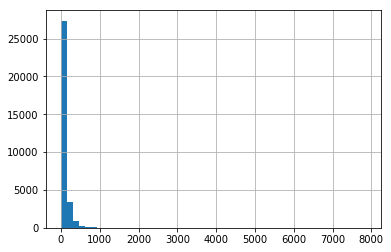

In [71]:
(100_000 * analyse_df.generaliste / analyse_df.NBPERSMENFISC15).hist(bins=50)

In [72]:
analyse_df['generaliste_habitants'] = (100_000 * analyse_df.generaliste / analyse_df.NBPERSMENFISC15)

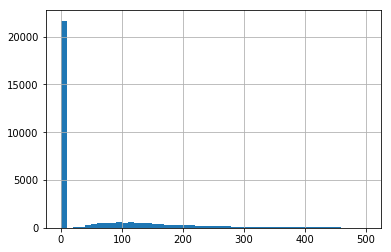

In [73]:
analyse_df.query('generaliste_habitants < 500').generaliste_habitants.hist(bins=50)

In [74]:
analyse_df.CODGEO.str[:2].head()

0    01
1    01
2    01
3    01
4    01
Name: CODGEO, dtype: object

In [75]:
analyse_df.loc[(analyse_df.CODGEO.isnull()) & (analyse_df.codecommuneetablissement.str[:2] == '98')]

,CODGEO,LIBGEO,NBMENFISC15,NBPERSMENFISC15,MED15,PIMP15,TP6015,TP60AGE115,TP60AGE215,TP60AGE315,...,chirurgien,dentiste,generaliste,hopital,infirmiers,organe,radiologiste,reeducateur_podologue,_merge,generaliste_habitants
35916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,right_only,NaN
35917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,right_only,NaN
35918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,right_only,NaN
35919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,right_only,NaN
35920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,right_only,NaN
35921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,3.0,6.0,2.0,0.0,0.0,0.0,right_only,NaN


In [76]:
analyse_df.loc[(analyse_df.CODGEO.isnull()) & (analyse_df.codecommuneetablissement.str[:2] == '98')]['codecommuneetablissement']

35916    98733
35917    98735
35918    98738
35919    98749
35920    98812
35921    98818
Name: codecommuneetablissement, dtype: object

In [77]:
analyse_df.loc[analyse_df.CODGEO.isnull()]['codecommuneetablissement']

35848    29083
35849    97101
35850    97102
35851    97103
35852    97104
35853    97105
35854    97106
35855    97107
35856    97108
35857    97109
35858    97110
35859    97111
35860    97112
35861    97113
35862    97114
35863    97115
35864    97116
35865    97117
35866    97118
35867    97119
35868    97120
35869    97121
35870    97122
35871    97124
35872    97125
35873    97126
35874    97128
35875    97129
35876    97130
35877    97131
         ...  
35892    97312
35893    97313
35894    97353
35895    97360
35896    97502
35897    97601
35898    97602
35899    97603
35900    97604
35901    97605
35902    97606
35903    97607
35904    97608
35905    97609
35906    97610
35907    97611
35908    97612
35909    97613
35910    97614
35911    97615
35912    97616
35913    97617
35914    97701
35915    97801
35916    98733
35917    98735
35918    98738
35919    98749
35920    98812
35921    98818
Name: codecommuneetablissement, Length: 74, dtype: object

In [78]:
# Affiche les communes qui n'ont pas de code geo (on peut connaître le département)
analyse_df.loc[analyse_df.CODGEO.isnull()]['codecommuneetablissement'].str[:2].value_counts()

97    67
98     6
29     1
Name: codecommuneetablissement, dtype: int64

In [79]:
analyse_df.columns

Index(['CODGEO', 'LIBGEO', 'NBMENFISC15', 'NBPERSMENFISC15', 'MED15', 'PIMP15',
       'TP6015', 'TP60AGE115', 'TP60AGE215', 'TP60AGE315', 'TP60AGE415',
       'TP60AGE515', 'TP60AGE615', 'TP60TOL115', 'TP60TOL215', 'PACT15',
       'PTSA15', 'PCHO15', 'PBEN15', 'PPEN15', 'PPAT15', 'PPSOC15', 'PPFAM15',
       'PPMINI15', 'PPLOGT15', 'PIMPOT15', 'D115', 'D915', 'RD15',
       'codecommuneetablissement', 'ambulance', 'analyse_medicale', 'autre',
       'autre_specialiste', 'chirurgien', 'dentiste', 'generaliste', 'hopital',
       'infirmiers', 'organe', 'radiologiste', 'reeducateur_podologue',
       '_merge', 'generaliste_habitants'],
      dtype='object')

In [80]:
dept_df = (analyse_df
          .dropna(subset=['CODGEO', 'NBPERSMENFISC15'])
          .assign(departement = lambda df: df.CODGEO.str[:2])
          .groupby('departement')
           [['NBPERSMENFISC15','ambulance', 'analyse_medicale', 'autre',
       'autre_specialiste', 'chirurgien', 'dentiste', 'generaliste', 'hopital',
       'infirmiers', 'organe', 'radiologiste', 'reeducateur_podologue',]]
           .sum()
          )

In [81]:
dept_df.head()

,NBPERSMENFISC15,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,organe,radiologiste,reeducateur_podologue
departement,,,,,,,,,,,,,
01,611797.0,82.0,39.0,718.0,203.0,39.0,368.0,597.0,138.0,1070.0,1.0,38.0,959.0
02,518914.0,65.0,36.0,238.0,263.0,25.0,261.0,567.0,119.0,986.0,5.0,59.0,562.0
03,332244.5,59.0,25.0,307.0,157.0,35.0,192.0,392.0,59.0,774.0,2.0,30.0,525.0
04,156728.5,23.0,18.0,279.0,118.0,15.0,134.0,342.0,48.0,631.0,0.0,6.0,419.0
05,135089.5,33.0,14.0,235.0,138.0,21.0,134.0,379.0,66.0,483.0,2.0,25.0,596.0


In [82]:
dept_df['generaliste_habitant'] = 100_000 * dept_df.generaliste / dept_df.NBPERSMENFISC15

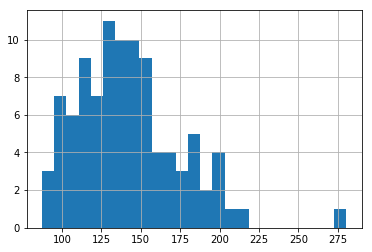

In [83]:
dept_df.generaliste_habitant.hist(bins=25)

In [84]:
dept_df.generaliste_habitant.describe()
# En moyenne 142 généralistes pour 100 000 habitants

count     97.000000
mean     142.256348
std       33.114357
min       87.292227
25%      117.985399
50%      136.252689
75%      160.325195
max      280.554743
Name: generaliste_habitant, dtype: float64

In [85]:
# Affichage des 5 départements les mieux classés et des 5 départements les moins bien classés en terme de généralistes par habitants

pd.concat([
    dept_df.sort_values(by='generaliste_habitant')[['NBPERSMENFISC15', 'generaliste_habitant']].head(),
    dept_df.sort_values(by='generaliste_habitant')[['NBPERSMENFISC15', 'generaliste_habitant']].tail()],
    axis=0)


,NBPERSMENFISC15,generaliste_habitant
departement,,
27,592263.5,87.292227
53,301157.0,91.978603
28,429705.0,92.388965
89,329374.0,95.635964
72,554255.5,95.984614
34,1084819.0,202.430083
06,1113414.5,203.248655
2A,123172.0,203.780080
04,156728.5,218.211748


In [86]:
dept_df['infirmiers_habitant'] = 100_000 * dept_df.infirmiers / dept_df.NBPERSMENFISC15

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

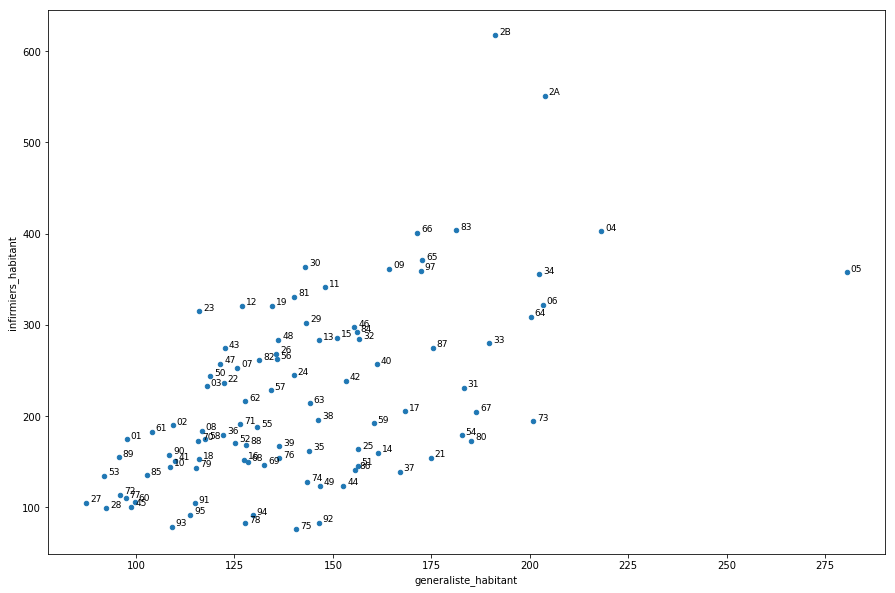

In [88]:
# En rajoutant un ";" à la fin, on permet d'afficher un graphique sans afficher le nom de l'objet


dept_df.plot(kind='scatter', x='generaliste_habitant', y='infirmiers_habitant', figsize=(15,10));

# Comme le tableau est petit, on peut itérer sur chaque élément, on itère donc sur toutes les valeurs de i. Sur chaque valeur de i on écrit un texte
# iloc = index location. Pour éviter qu'ils soient trop collés au point, on rajoute un décalage en x et en y, ce qui permet de décoller les points
# 

for i in range(0,dept_df.shape[0]):
    plt.text(dept_df['generaliste_habitant'].iloc[i]+1, # Position en x du libellé
            dept_df['infirmiers_habitant'].iloc[i]+1, # Position en y du libellé
            dept_df.index[i], # texte du libellé.
             fontsize = 9
            )

C:\Users\VirgilusFixe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


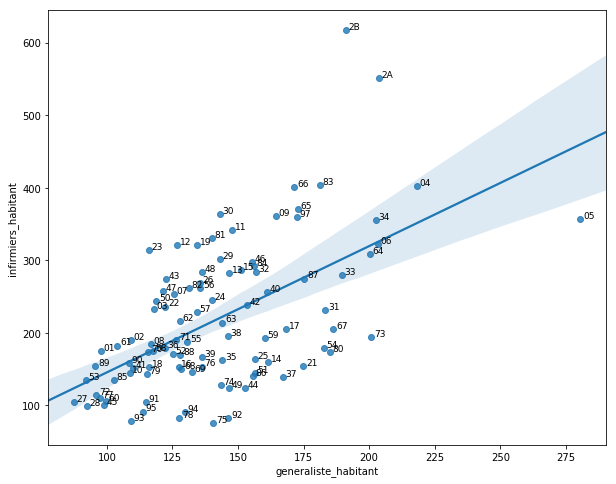

In [89]:
# Avec seaborn

plt.figure(figsize=(10, 8))

sns.regplot(x='generaliste_habitant', y='infirmiers_habitant', data=dept_df)

for i in range(0,dept_df.shape[0]):
    plt.text(dept_df['generaliste_habitant'].iloc[i]+1, # Position en x du libellé
            dept_df['infirmiers_habitant'].iloc[i]+1, # Position en y du libellé
            dept_df.index[i], # texte du libellé.
             fontsize = 9
            )

### Pour les ambulanciers

In [90]:
dept_df['ambulance_habitant'] = 100_000 * dept_df.ambulance / dept_df.NBPERSMENFISC15

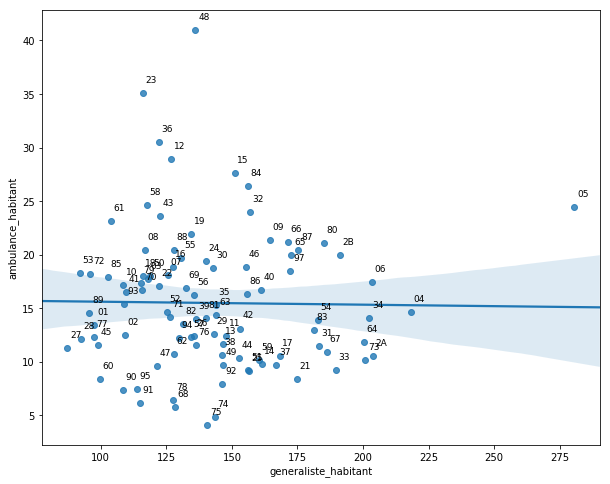

In [91]:
# Avec seaborn

plt.figure(figsize=(10, 8))

sns.regplot(x='generaliste_habitant', y='ambulance_habitant', data=dept_df)

for i in range(0,dept_df.shape[0]):
    plt.text(dept_df['generaliste_habitant'].iloc[i]+1, # Position en x du libellé
            dept_df['ambulance_habitant'].iloc[i]+1, # Position en y du libellé
            dept_df.index[i], # texte du libellé.
             fontsize = 9
            )

### Pour les hôpitaux

In [92]:
dept_df['hopital_habitant'] = 100_000 * dept_df.hopital / dept_df.NBPERSMENFISC15

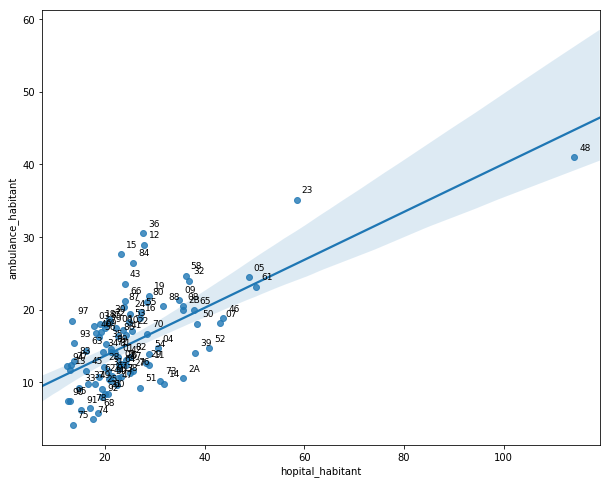

In [93]:
# Avec seaborn

plt.figure(figsize=(10, 8))

sns.regplot(x='hopital_habitant', y='ambulance_habitant', data=dept_df)

for i in range(0,dept_df.shape[0]):
    plt.text(dept_df['hopital_habitant'].iloc[i]+1, # Position en x du libellé
            dept_df['ambulance_habitant'].iloc[i]+1, # Position en y du libellé
            dept_df.index[i], # texte du libellé.
             fontsize = 9
            )

In [94]:
# Ici on a une bonne corrélation. Le dépt 48 est toujours assez spécial.

In [95]:
import pygal.maps

In [96]:
dept_df['generaliste_habitant'].to_dict()

{'01': 97.58138729022862,
 '02': 109.26666075688843,
 '03': 117.98539930683577,
 '04': 218.21174834187784,
 '05': 280.55474333682486,
 '06': 203.2486553749749,
 '07': 125.66561522204098,
 '08': 116.70512631056447,
 '09': 164.34379868951828,
 '10': 108.6420262425502,
 '11': 147.88217760822155,
 '12': 126.804050226409,
 '13': 146.53114451239068,
 '14': 161.41066604088067,
 '15': 151.02175657180612,
 '16': 127.3592415049617,
 '17': 168.25096408592333,
 '18': 115.99241202376675,
 '19': 134.43361628617282,
 '21': 174.87053247668564,
 '22': 122.25124914398762,
 '23': 116.03223717349069,
 '24': 140.06910075637313,
 '25': 156.42196373449696,
 '26': 135.56040672138622,
 '27': 87.2922271927951,
 '28': 92.38896452217219,
 '29': 143.16440532832294,
 '2A': 203.7800798882863,
 '2B': 191.17458234060462,
 '30': 142.97118103570696,
 '31': 183.23727918817158,
 '32': 156.74330912458026,
 '33': 189.6048744890934,
 '34': 202.4300828064405,
 '35': 143.96688761584835,
 '36': 122.06709528862626,
 '37': 166.98

### Ajout des régions dans le fichier département

In [97]:
regions_df = pd.read_csv('https://gist.githubusercontent.com/gzurbach/b0ccdeda51ec2fe135d5/raw/b89e3d2ac21ddb251b1aed0528ddc9437a07818f/departments_regions_france_2016.csv',
                         dtype=str,
                         sep = ",",
                        )
regions_df.rename(columns={'departmentCode':'code_dept',
                           'departmentName':'nom_dept',
                           'regionName':'nom_region'
                          }, inplace=True)
regions_df['code_dept'] = regions_df['code_dept'].str.upper() # On passe la colonne en upper case pour que les codes de la corse ("2a" et "2b") soient correctement formatés.


In [98]:
dept_df.rename(columns={'NBPERSMENFISC15':'population'}, inplace=True)
dept_df = dept_df.rename_axis('code_dept')
dept_df = dept_df.drop('97') # Suppression de l'observation des départements qui ne sont pas en France métropolitaine et commencent donc par 97

In [99]:
dept_df.columns

Index(['population', 'ambulance', 'analyse_medicale', 'autre',
       'autre_specialiste', 'chirurgien', 'dentiste', 'generaliste', 'hopital',
       'infirmiers', 'organe', 'radiologiste', 'reeducateur_podologue',
       'generaliste_habitant', 'infirmiers_habitant', 'ambulance_habitant',
       'hopital_habitant'],
      dtype='object')

In [58]:
dept_df = pd.merge(dept_df,
                     regions_df[['nom_region','code_dept','nom_dept']],
                     how='left', on='code_dept'
                    ).set_index('code_dept')

##### Calcul de tous les taux pour 100 000 habitants

In [103]:
def tx_par_hab(list_of_columns):
    for column in list_of_columns:
        dept_df[column +'_habitant'] = 100_000 * dept_df[column] / dept_df['population']

In [101]:
columns_to_process = ['ambulance', 'analyse_medicale', 'autre',
                    'autre_specialiste', 'chirurgien', 'dentiste',
                    'organe','radiologiste','reeducateur_podologue']
tx_par_hab(columns_to_process)

### Calcul d'un indice

Il existe une grande variété d'indicateurs utilisés pour calculer un désert médical.
Le ministère de la Santé [considère](http://www.leparisien.fr/societe/grand-debat-et-si-on-forcait-les-medecins-a-s-installer-dans-les-deserts-medicaux-26-02-2019-8020416.php) qu’un territoire rentre dans la catégorie du « désert médical » quand la densité de médecins par rapport à la population est de 30 % inférieure à la moyenne nationale.

En France il y a en moyenne, pour 100 000 habitants, [82 médecins généralistes et 85 spécialistes.](http://www.securite-sociale.fr/IMG/pdf/2_demographie_des_medecins_liberaux_et_remboursements_de_l_assurance_maladie.pdf). Malheureusement, les données utilisées pour notre étude nous amènent à un résultat plus élevé puisque notre moyenne se situe à 142 généralistes par habitants. Cependant, on peut garder l'idée comme quoi les départements pour lesquels cette moyenne est inférieure à 30% de la moyenne nationale connaissent un fort déficit de médecin. Cela peut être utile pour mettre en valeur certains départements, mais est trop réducteur pour correctement caractériser un désert médical.

##### Calcul des moyennes pour le taux d'Hopitaux par habitants, d'infirmiers par habitants et de généralistes par habitants (pour 100 000 personnes) 

In [418]:
dept_df['generaliste_habitant'].describe()

count     96.000000
mean     141.943123
std       33.143424
min       87.292227
25%      117.880939
50%      136.179938
75%      157.638781
max      280.554743
Name: generaliste_habitant, dtype: float64

In [419]:
dept_df['infirmiers_habitant'].describe()

count     96.000000
mean     217.735805
std      100.081292
min       76.082845
25%      149.056570
50%      190.423203
75%      280.623965
max      617.750703
Name: infirmiers_habitant, dtype: float64

In [420]:
dept_df['hopital_habitant'].describe()

count     96.000000
mean      25.761957
std       12.595246
min       12.438695
25%       19.397893
50%       23.083313
75%       28.486161
max      114.154416
Name: hopital_habitant, dtype: float64

In [107]:
# Moyennes générales :

MOY_GENERALISTES_PAR_HAB = 141.9
MOY_INFIRMIERS_PAR_HAB = 217.7
MOY_HOPITAUX_PAR_HAB = 25.7

On définit une fonction qui calcule l'écart à la moyenne pour trois des indices les plus importants, effectue ensuite la moyenne de ces écarts et multiplie le tout par 100. Plus l'indice est bas, plus le département a des carences en terme d'accès aux professionnels de santé.

In [108]:
def indice(tx_generalistes,tx_infirmiers,tx_hopitaux):
    indice = (((tx_generalistes / MOY_GENERALISTES_PAR_HAB)
                    +(tx_infirmiers / MOY_INFIRMIERS_PAR_HAB)
                    +(tx_hopitaux / MOY_HOPITAUX_PAR_HAB))
                   / 3)
    return indice * 100
    

In [109]:
dept_df['indice'] = indice(dept_df['generaliste_habitant'],dept_df['infirmiers_habitant'],dept_df['hopital_habitant'])

In [424]:
dept_df.head()

,NBPERSMENFISC15,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,organe,radiologiste,reeducateur_podologue,generaliste_habitant,infirmiers_habitant,ambulance_habitant,hopital_habitant,regionName,departmentName,indice
departement,,,,,,,,,,,,,,,,,,,,
01,611797.0,82.0,39.0,718.0,203.0,39.0,368.0,597.0,138.0,1070.0,1.0,38.0,959.0,97.581387,174.894614,13.403139,22.556502,Auvergne-Rhône-Alpes,Ain,78.957882
02,518914.0,65.0,36.0,238.0,263.0,25.0,261.0,567.0,119.0,986.0,5.0,59.0,562.0,109.266661,190.012218,12.526160,22.932509,Nord-Pas-de-Calais-Picardie,Aisne,84.505271
03,332244.5,59.0,25.0,307.0,157.0,35.0,192.0,392.0,59.0,774.0,2.0,30.0,525.0,117.985399,232.960967,17.758007,17.758007,Auvergne-Rhône-Alpes,Allier,86.418085
04,156728.5,23.0,18.0,279.0,118.0,15.0,134.0,342.0,48.0,631.0,0.0,6.0,419.0,218.211748,402.607056,14.675059,30.626210,Provence-Alpes-Côte d'Azur,Alpes-de-Haute-Provence,152.627770
05,135089.5,33.0,14.0,235.0,138.0,21.0,134.0,379.0,66.0,483.0,2.0,25.0,596.0,280.554743,357.540742,24.428249,48.856499,Provence-Alpes-Côte d'Azur,Hautes-Alpes,184.017211


In [110]:
dept_df.to_csv('departements_et_regions.csv', sep=',', encoding='utf-8', quotechar='"', index=True, quoting=csv.QUOTE_ALL)